In [3]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import itemgetter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns

In [4]:
df_train_prepared = pd.read_pickle('df_train_prepared')
#df_train_pred = pd.read_pickle('df_train_prediction')

train_no_click =  df_train_prepared[df_train_prepared['click'] == 0]
train_no_click = train_no_click.rename(columns = {'click':'no_click'})

train_click =  df_train_prepared[df_train_prepared['click'] == 1]

In [5]:
def features_CTR (feature): 
    no_click = train_no_click.groupby([feature,'no_click']).size().to_frame('no_click_counts')
    no_click = no_click.reset_index()
    no_click = no_click.drop(['no_click'], axis =1)

    clicked = train_click.groupby([feature,'click']).size().to_frame('click_counts')
    clicked = clicked.reset_index()
    clicked = clicked.drop(['click'], axis =1)

    df_join = pd.merge(no_click , clicked, on = feature)
    df_join['ratio'] = df_join['click_counts']/df_join['no_click_counts']
    return df_join

In [6]:
features = list(df_train_prepared)
features

['click',
 'weekday',
 'hour',
 'region',
 'city',
 'adexchange',
 'slotwidth',
 'slotheight',
 'slotprice',
 'bidprice',
 'payprice',
 'advertiser',
 'useragent_encoded',
 'IP_encoded',
 'url_encoded',
 'domain_encoded',
 'slotid_encoded',
 'slotvisibility_encoded',
 'slotformat_encoded',
 'creative_encoded',
 'keypage_encoded',
 'usertag_encoded']

In [11]:
weekday = features_CTR('weekday').sort_values('ratio', ascending = False)
print('weekday:')
print(len(weekday))
print(weekday['ratio'].min())
print(weekday['ratio'].max())
print(weekday['ratio'].mean())
print()

hour = features_CTR('hour').sort_values('ratio', ascending = False)
print('hour:')
print(len(hour))
print(hour['ratio'].min())
print(hour['ratio'].max())
print(hour['ratio'].mean())
print()

region = features_CTR('region').sort_values('ratio', ascending = False)
print('region:')
print(len(region))
print(region['ratio'].min())
print(region['ratio'].max())
print(region['ratio'].mean())
print()

city =features_CTR('city').sort_values('ratio', ascending = False)
print('city:')
print(len(city))
print(region['ratio'].min())
print(city['ratio'].max())
print(city['ratio'].mean())
print()

adexchange =features_CTR('adexchange').sort_values('ratio', ascending = False)
print('adexchange:')
print(len(adexchange))
print(adexchange['ratio'].min())
print(adexchange['ratio'].max())
print(adexchange['ratio'].mean())
print()



advertiser = features_CTR('advertiser').sort_values('ratio', ascending = False)
print('advertiser:')
print(len(advertiser))
print(advertiser['ratio'].min())
print(advertiser['ratio'].max())
print(advertiser['ratio'].mean())
print()

useragent =features_CTR('useragent_encoded').sort_values('ratio', ascending = False)
print('useragent:')
print(len(useragent))
print(useragent['ratio'].min())
print(useragent['ratio'].max())
print(useragent['ratio'].mean())
print()

IP = features_CTR('IP_encoded').sort_values('ratio', ascending = False)
IP = IP[IP['no_click_counts'] > 10]
print('IP:')
print(len(IP))
print(IP['ratio'].min()) 
print(IP['ratio'].max()) 
print(IP['ratio'].mean())
print()

url = features_CTR('url_encoded').sort_values('ratio', ascending = False)
url = url[url['no_click_counts'] > 10]
print('url:')
print(len(url))
print(url['ratio'].min()) 
print(url['ratio'].max())
print(url['ratio'].mean())
print()

domain = features_CTR('domain_encoded').sort_values('ratio', ascending = False)
domain = domain[domain['no_click_counts'] > 10]
print('domain:')
print(len(domain))
print(domain['ratio'].min())
print(domain['ratio'].max())
print(domain['ratio'].mean())
print()






keypage = features_CTR('keypage_encoded').sort_values('ratio', ascending = False)
print('keypage:')
print(len(keypage))
print(keypage['ratio'].min())
print(keypage['ratio'].max())
print(keypage['ratio'].mean())
print()

usertag = features_CTR('usertag_encoded').sort_values('ratio', ascending = False)
usertag = usertag[usertag['no_click_counts'] > 10]
print('usertag:')
print(len(usertag))
print(usertag['ratio'].min())
print(usertag['ratio'].max())
print(usertag['ratio'].mean())

weekday:
7
0.0005694155966767372
0.0009657203057889192
0.0007465898178900671

hour:
24
0.0002604053643505056
0.0010184293865706832
0.0006937929444124118

region:
34
0.0005165035171429977
0.002372479240806643
0.000866700338533789

city:
297
0.0005165035171429977
0.006963788300835654
0.0008971759577313525

adexchange:
5
0.0004752554498042698
0.00437394178827703
0.0013726208445518173

advertiser:
9
0.00032178403053206617
0.00437394178827703
0.0010188737709879783

useragent:
16
0.0003566333808844508
0.02631578947368421
0.003988507590551258

IP:
400
0.00047393364928909954
0.13636363636363635
0.03842094272025772

url:
566
4.839099927413501e-05
0.10526315789473684
0.018822931462441832

domain:
409
5.278158978148422e-05
0.07692307692307693
0.007385563581420521

keypage:
19
0.00010374520178441747
0.001413760603204524
0.0006458992656308064

usertag:
222
7.698229407236336e-05
0.75
0.037639448003037465


In [8]:
#for f in features: 
#plot_features(weekday)
def plot_features(feature, f):
    plt.figure(figsize=(15, 10))
    x = feature[f]
    y = feature['ratio']
    plt.subplot(222)
    sns.regplot(x, y, data = feature, color="red")
    
#this line to adjust y axis
    plt.ylim(- 0.001, 0.003)
    plt.show()

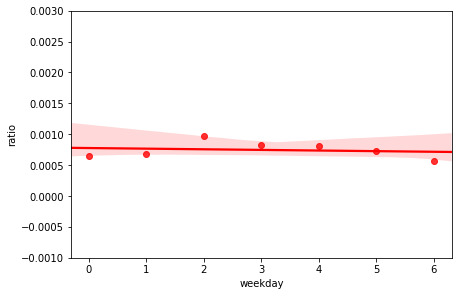

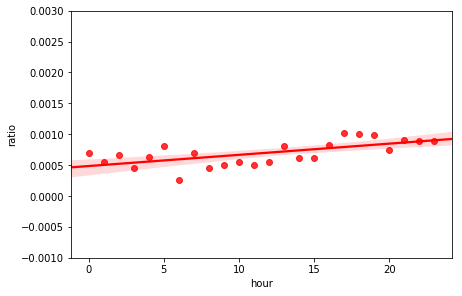

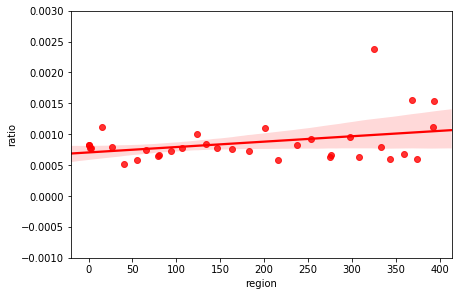

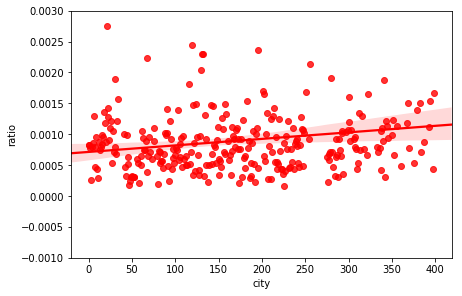

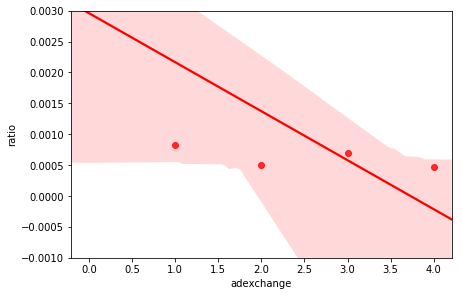

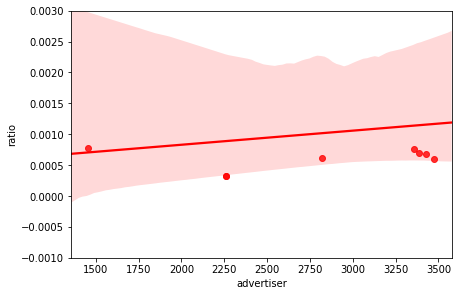

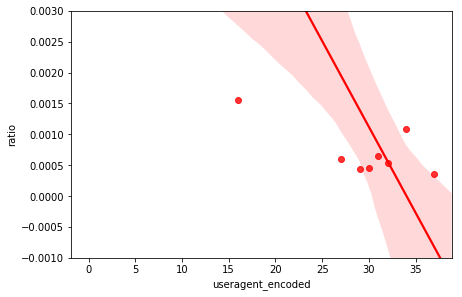

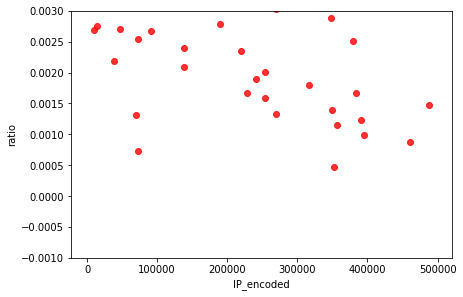

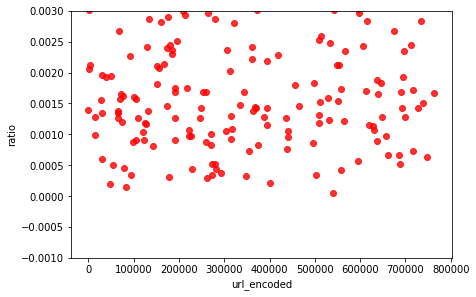

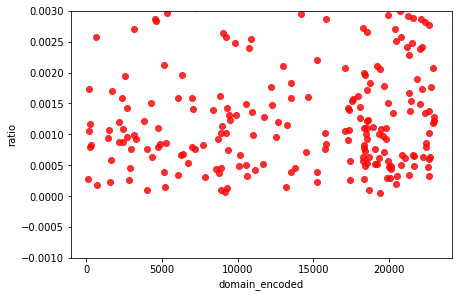

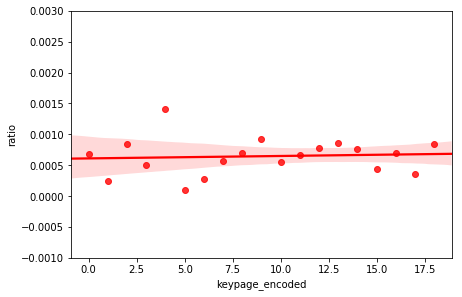

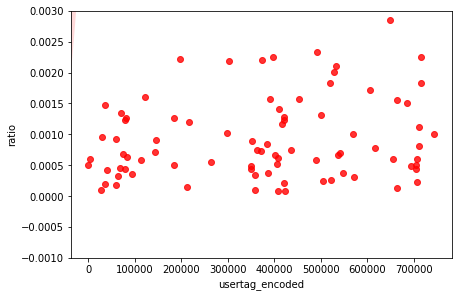

In [12]:
plot_features(weekday, 'weekday')

plot_features(hour, 'hour')

plot_features(region, 'region')

plot_features(city, 'city')

plot_features(adexchange, 'adexchange')


plot_features(advertiser, 'advertiser')

plot_features(useragent, 'useragent_encoded')

plot_features(IP, 'IP_encoded')

plot_features(url, 'url_encoded')

plot_features(domain, 'domain_encoded')


plot_features(keypage, 'keypage_encoded')

plot_features(usertag, 'usertag_encoded')
